In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
pd.set_option('display.max.columns', None)

# missing value

In [5]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [7]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [8]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [9]:
missing_values = ['n/a', 'na', '--']
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [10]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

## unexpected missing value

In [11]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [12]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [13]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## summarizing missing value

In [14]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [15]:
df.isnull().values.any()

True

In [16]:
df.isnull().sum().sum()

12

## replacing

In [17]:
df['ST_NUM'].fillna(125, inplace=True)

In [18]:
df['ST_NUM']

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [19]:
df.loc[2, 'ST_NUM'] = 125

In [20]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [21]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## perbaiki data

In [22]:
dff = df.copy()
dff

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [23]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [24]:
dff.loc[dff['NUM_BATH']=='HURLEY', 'NUM_BATH']=np.nan
dff.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Analisis data besitas inggris

In [25]:
%matplotlib inline

In [26]:
data = pd.ExcelFile('obes.xls')
data

In [27]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [28]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [29]:
#rename header
data_age.rename(columns={u'Unnamed: 0':u'Year'}, inplace=True)

In [30]:
data_age.dropna(inplace=True)

In [31]:
data_age.set_index('Year', inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

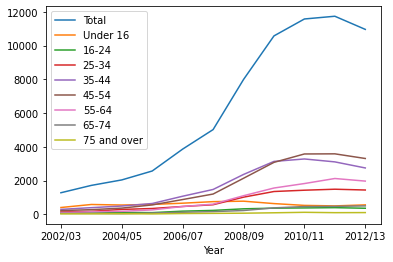

In [32]:
data_age.plot()

<AxesSubplot:xlabel='Year'>

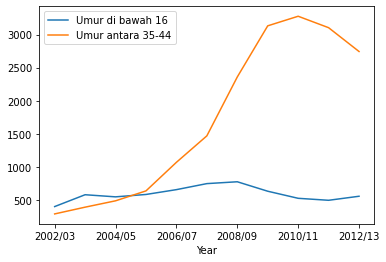

In [33]:
data_age['Under 16'].plot(label = 'Umur di bawah 16', legend=True)
data_age['35-44'].plot(label = 'Umur antara 35-44', legend=True)

# Time Series

In [34]:
from datetime import datetime

In [35]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [36]:
dfts = pd.DataFrame(date_rng, columns=['date'])
dfts['data'] = np.random.randint(0, 100, size = (len(date_rng)))
dfts.head()

,date,data
0,2020-01-01 00:00:00,50
1,2020-01-01 01:00:00,88
2,2020-01-01 02:00:00,74
3,2020-01-01 03:00:00,95
4,2020-01-01 04:00:00,78


In [37]:
dfts['datetime'] = pd.to_datetime(dfts['date'])
dfts = dfts.set_index('datetime')
dfts.drop(['date'], axis=1, inplace=True)
dfts.head()

,data
datetime,
2020-01-01 00:00:00,50
2020-01-01 01:00:00,88
2020-01-01 02:00:00,74
2020-01-01 03:00:00,95
2020-01-01 04:00:00,78


## timestamp berjenis string

In [38]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [39]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [40]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']
string_date_rng_2


['June-01-2020', 'June-02-2020', 'June-03-2020']

In [41]:
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]
timestamp_date_rng_2


[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [42]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns = ['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [43]:
#melihat data pada hari tertentu
dfts[dfts.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,53
2020-01-02 01:00:00,43
2020-01-02 02:00:00,71
2020-01-02 03:00:00,95
2020-01-02 04:00:00,40
2020-01-02 05:00:00,16
2020-01-02 06:00:00,60
2020-01-02 07:00:00,85
2020-01-02 08:00:00,18


In [44]:
dfts['2020-01-06':'2020-01-07']

,data
datetime,
2020-01-06 00:00:00,76
2020-01-06 01:00:00,78
2020-01-06 02:00:00,50
2020-01-06 03:00:00,56
2020-01-06 04:00:00,10
2020-01-06 05:00:00,21
2020-01-06 06:00:00,5
2020-01-06 07:00:00,38
2020-01-06 08:00:00,61


In [45]:
#rata-rata harian dari data
dfts.resample('D').mean()

,data
datetime,
2020-01-01,49.333333
2020-01-02,52.708333
2020-01-03,52.666667
2020-01-04,46.250000
2020-01-05,55.583333
2020-01-06,42.625000
2020-01-07,49.250000
2020-01-08,30.000000


In [46]:
#jumlah data dimulai dari data ke-3
dfts['rolling_sum'] = dfts.rolling(3).sum()
dfts

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,50,NaN
2020-01-01 01:00:00,88,NaN
2020-01-01 02:00:00,74,212.0
2020-01-01 03:00:00,95,257.0
2020-01-01 04:00:00,78,247.0
...,...,...
2020-01-07 20:00:00,38,153.0
2020-01-07 21:00:00,78,206.0
2020-01-07 22:00:00,26,142.0


In [47]:
#mengembalikan nilai 
dfts['rolling_sum_backfilled'] = dfts['rolling_sum'].fillna(method='backfill')
dfts

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,50,NaN,212.0
2020-01-01 01:00:00,88,NaN,212.0
2020-01-01 02:00:00,74,212.0,212.0
2020-01-01 03:00:00,95,257.0,257.0
2020-01-01 04:00:00,78,247.0,247.0
...,...,...,...
2020-01-07 20:00:00,38,153.0,153.0
2020-01-07 21:00:00,78,206.0,206.0
2020-01-07 22:00:00,26,142.0,142.0


# Timeseries on Dataset

In [48]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [49]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [50]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday
opsd_daily.head()


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [51]:
opsd_daily.loc['2016-06-06']

Consumption    1393.733
Wind             69.562
Solar           217.347
Wind+Solar      286.909
Year           2016.000
Month             6.000
Weekday           0.000
Name: 2016-06-06 00:00:00, dtype: float64

In [52]:
opsd_daily.loc['2016-06']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2016-06-01,1431.441,174.740,99.114,273.854,2016,6,2
2016-06-02,1421.839,108.363,120.895,229.258,2016,6,3
2016-06-03,1394.273,102.326,143.213,245.539,2016,6,4
2016-06-04,1170.051,54.248,173.422,227.670,2016,6,5
2016-06-05,1076.440,51.030,176.637,227.667,2016,6,6
2016-06-06,1393.733,69.562,217.347,286.909,2016,6,0
2016-06-07,1419.232,48.539,214.927,263.466,2016,6,1
2016-06-08,1420.198,162.731,160.187,322.918,2016,6,2
2016-06-09,1405.974,100.748,155.237,255.985,2016,6,3


## visualisasi data

<AxesSubplot:xlabel='Date'>

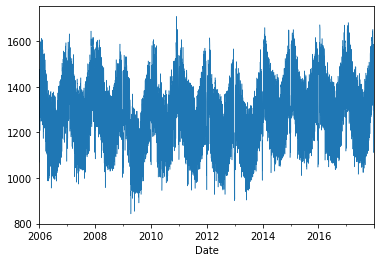

In [53]:
opsd_daily['Consumption'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Date'>

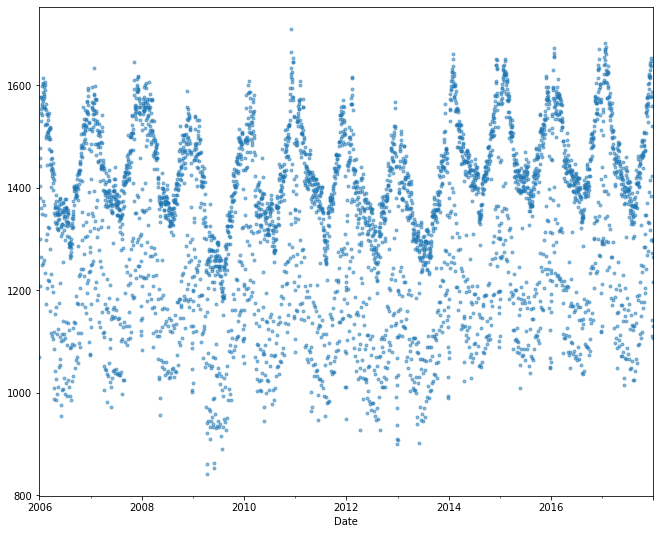

In [54]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9))

<AxesSubplot:xlabel='Date'>

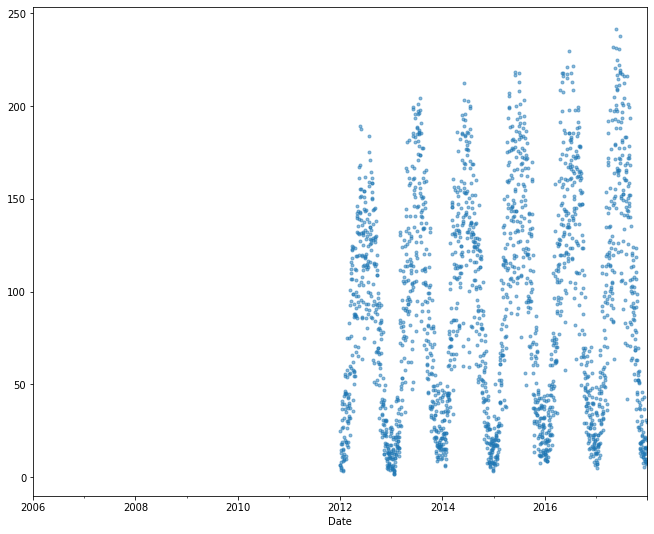

In [55]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9))

<AxesSubplot:xlabel='Date'>

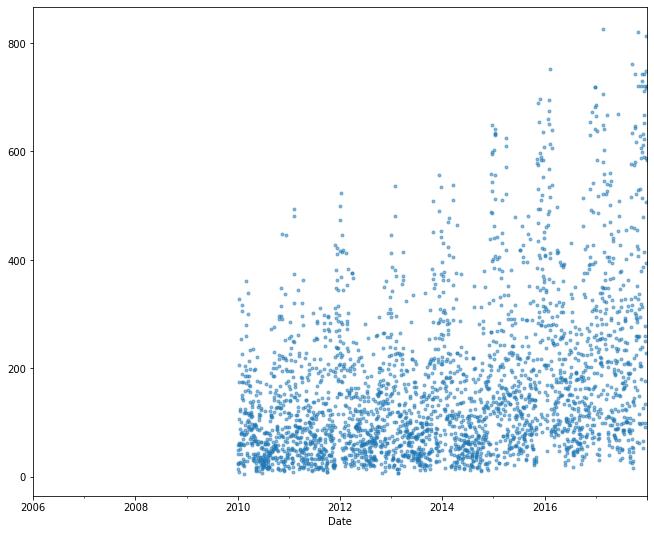

In [56]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9))

## plot dalam tahun tertentu

Text(0, 0.5, 'Daily Consumption (GWh)')

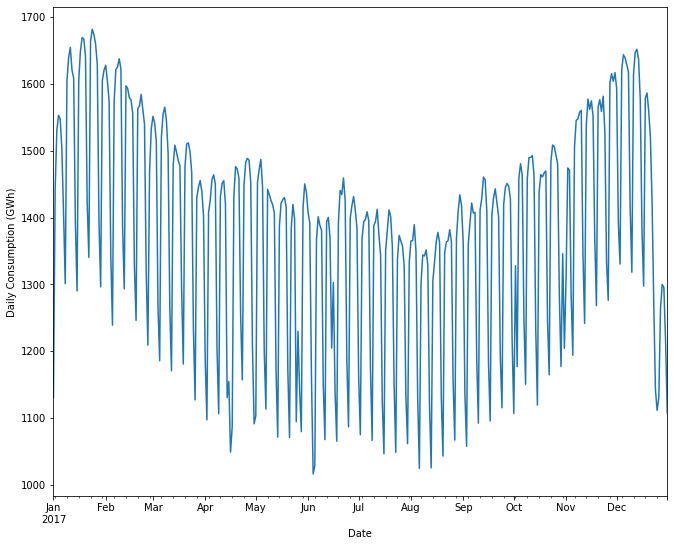

In [57]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

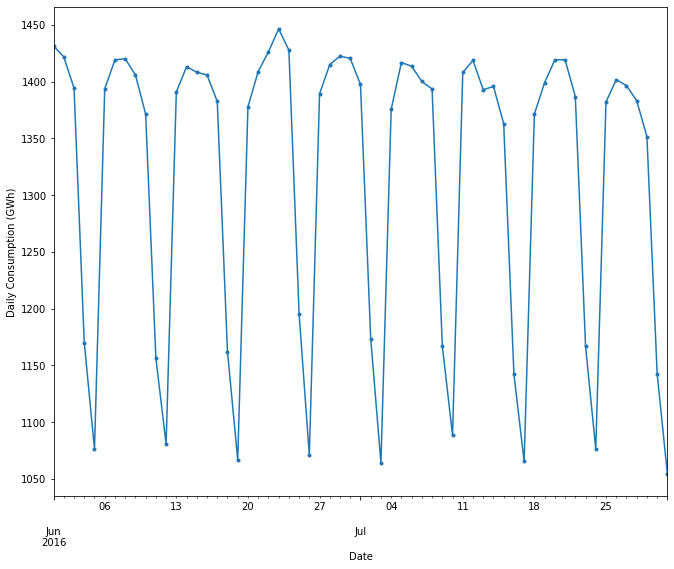

In [58]:
ax = opsd_daily.loc['2016-06':'2016-07', 'Consumption'].plot(marker='.', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

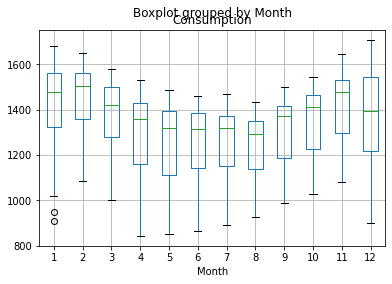

In [59]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

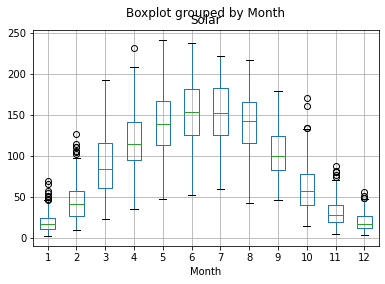

In [60]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

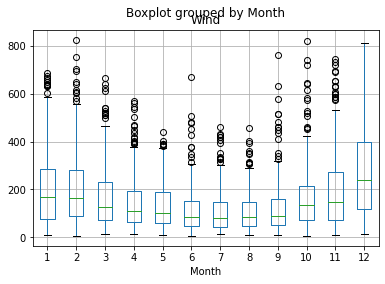

In [61]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

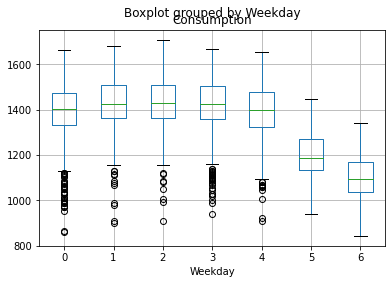

In [62]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

## resamplimg data menjadi weekly mean timeseries

In [63]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

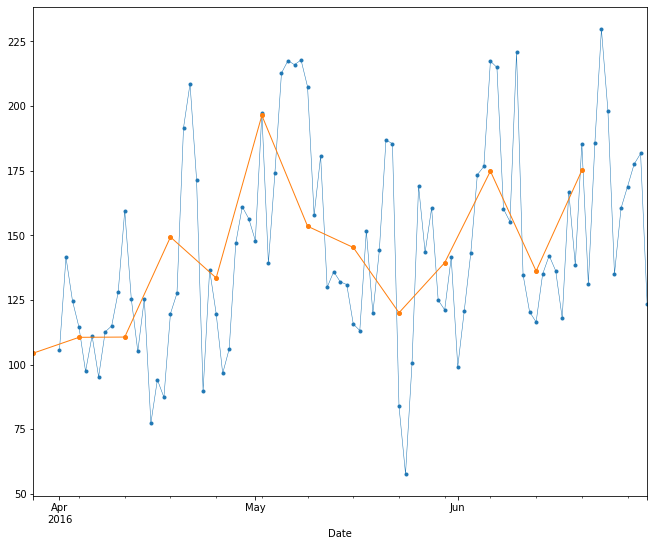

In [64]:
start, end = '2016-04', '2016-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11,9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='.', markersize=8, linestyle='-', linewidth=1, figsize=(11,9))
